Importing Libraries

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score,confusion_matrix,precision_score



Load the data

In [88]:
df = pd.read_csv('/content/data.csv')

In [89]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [90]:
df.shape

(569, 33)

Data Cleaning & Analysis

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [92]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [93]:
df.duplicated().sum()

0

In [94]:
df['diagnosis'].replace({'B':'1','M':'0'},inplace=True)

In [95]:
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

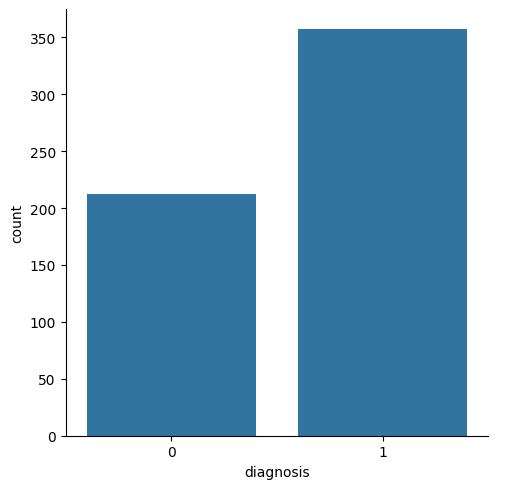

In [96]:
sns.catplot(x='diagnosis',data=df,kind='count')

In [97]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [99]:
df.shape

(569, 31)

<Axes: >

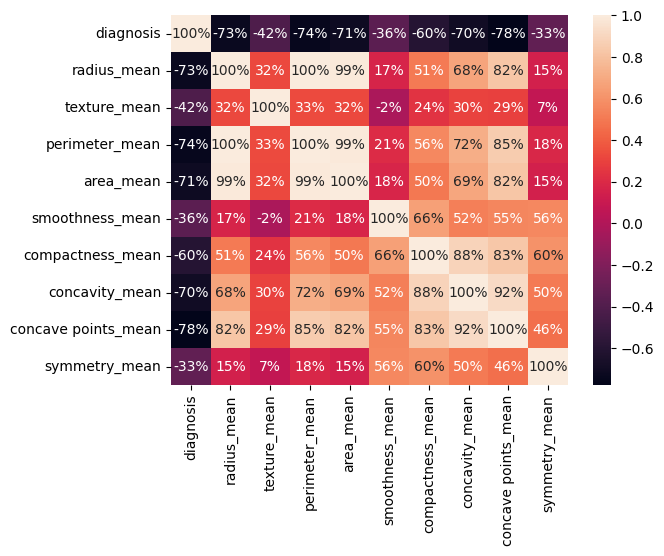

In [100]:
first = df.iloc[:, 0:10]
sns.heatmap(first.corr(),annot=True,fmt='.0%')

<Axes: >

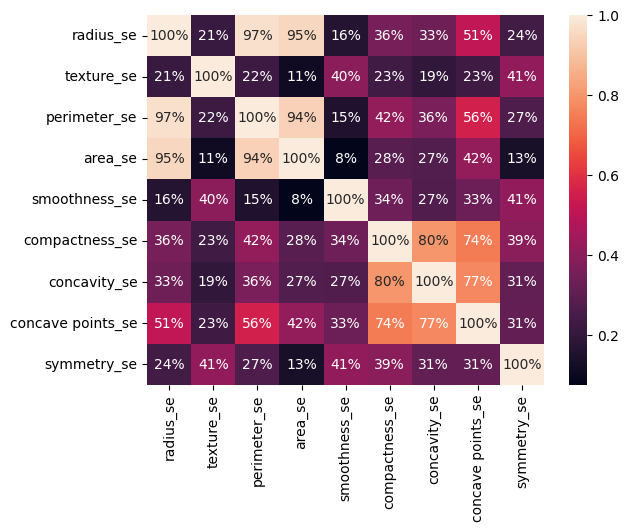

In [101]:
second = df.iloc[:, 11:20]
sns.heatmap(second.corr(),annot=True,fmt='.0%')

<Axes: >

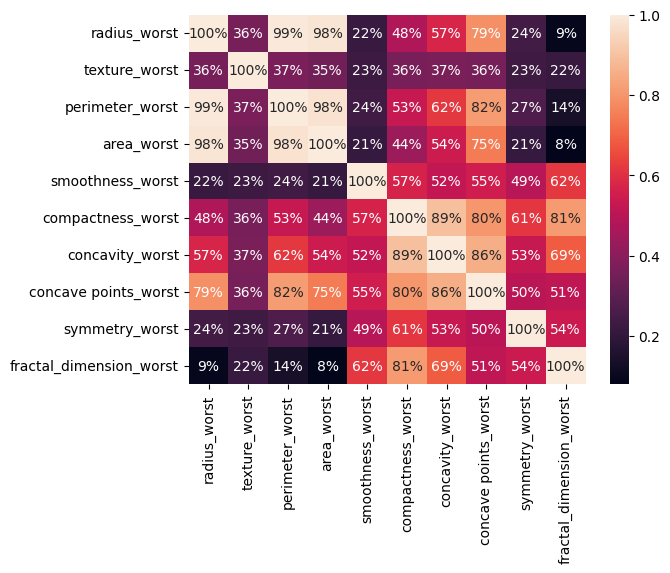

In [102]:
third = df.iloc[:, 21:31]
sns.heatmap(third.corr(),annot=True,fmt='.0%')

Split the data into train data and test data

In [103]:
x = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [105]:
x.shape,x_train.shape,x_test.shape

((569, 30), (455, 30), (114, 30))

Scaling the data

In [106]:
scaler = StandardScaler()

In [107]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

"Cross-Validation"

In [108]:
scores = []
for i in range(1,16):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_test_pred = knn.predict(x_test)
  scores.append(accuracy_score(y_test,y_test_pred))

<Axes: >

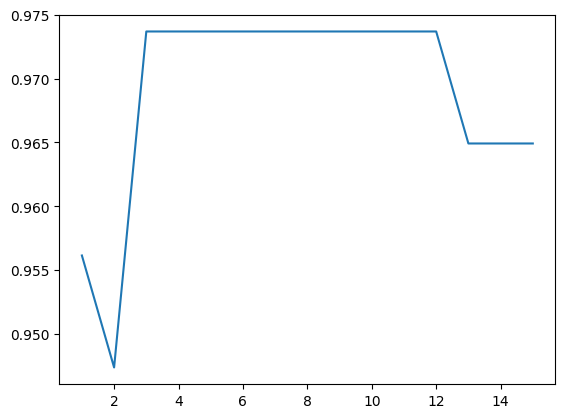

In [109]:
sns.lineplot(x=range(1, 16), y=scores)

Model Implementation

In [110]:
knn = KNeighborsClassifier(n_neighbors=3)

In [111]:
knn.fit(x_train,y_train)
y_test_pred = knn.predict(x_test)

In [112]:
accuracy_score(y_test,y_test_pred)

0.9736842105263158

More Model Implementation

In [113]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knn = KNeighborsClassifier()

gnb = GaussianNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
adc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [114]:
classifiers = {

               'SVC' : svc,
               'knn' : knn,

               'DTC' : dtc,
               'LR' : lrc,
               'GNB' : gnb,
               'BNB' : bnb,
               'RF' : rfc,
               'AdaBoost' : adc,
               'BGC' : bc,
               'ETC' : etc,
               'GBDT' : gbdt,



}

In [115]:
def train_classifier(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred, pos_label='0')
    cm = confusion_matrix(y_test,y_pred)


    return accuracy,precision,cm

In [116]:
accuracy_scores = []
precision_scores = []

for name,model in classifiers.items():

  accuracy,precision,cm=train_classifier(model,x_train,y_train,x_test,y_test)

  print("\nFor",name)
  print("\nAccuracy - ",accuracy)
  print("Precision - ",precision)
  print('confusion matrix\n',cm)

  accuracy_scores.append(accuracy)
  precision_scores.append(precision)


For SVC

Accuracy -  0.868421052631579
Precision -  0.8571428571428571
confusion matrix
 [[36  9]
 [ 6 63]]

For knn

Accuracy -  0.9736842105263158
Precision -  1.0
confusion matrix
 [[42  3]
 [ 0 69]]

For DTC

Accuracy -  0.9298245614035088
Precision -  0.8936170212765957
confusion matrix
 [[42  3]
 [ 5 64]]

For LR

Accuracy -  0.9649122807017544
Precision -  1.0
confusion matrix
 [[41  4]
 [ 0 69]]

For GNB

Accuracy -  0.9473684210526315
Precision -  0.9333333333333333
confusion matrix
 [[42  3]
 [ 3 66]]

For BNB

Accuracy -  0.9298245614035088
Precision -  0.8936170212765957
confusion matrix
 [[42  3]
 [ 5 64]]

For RF

Accuracy -  0.9385964912280702
Precision -  0.9318181818181818
confusion matrix
 [[41  4]
 [ 3 66]]

For AdaBoost

Accuracy -  0.9473684210526315
Precision -  0.9534883720930233
confusion matrix
 [[41  4]
 [ 2 67]]

For BGC

Accuracy -  0.9473684210526315
Precision -  0.9333333333333333
confusion matrix
 [[42  3]
 [ 3 66]]

For ETC

Accuracy -  0.92982456140350

In [117]:
DataFrame = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy', ascending=False)

In [118]:
DataFrame

,Algorithm,Accuracy,Precision
1,knn,0.973684,1.000000
3,LR,0.964912,1.000000
4,GNB,0.947368,0.933333
8,BGC,0.947368,0.933333
7,AdaBoost,0.947368,0.953488
10,GBDT,0.938596,0.931818
6,RF,0.938596,0.931818
5,BNB,0.929825,0.893617
2,DTC,0.929825,0.893617
9,ETC,0.929825,0.930233


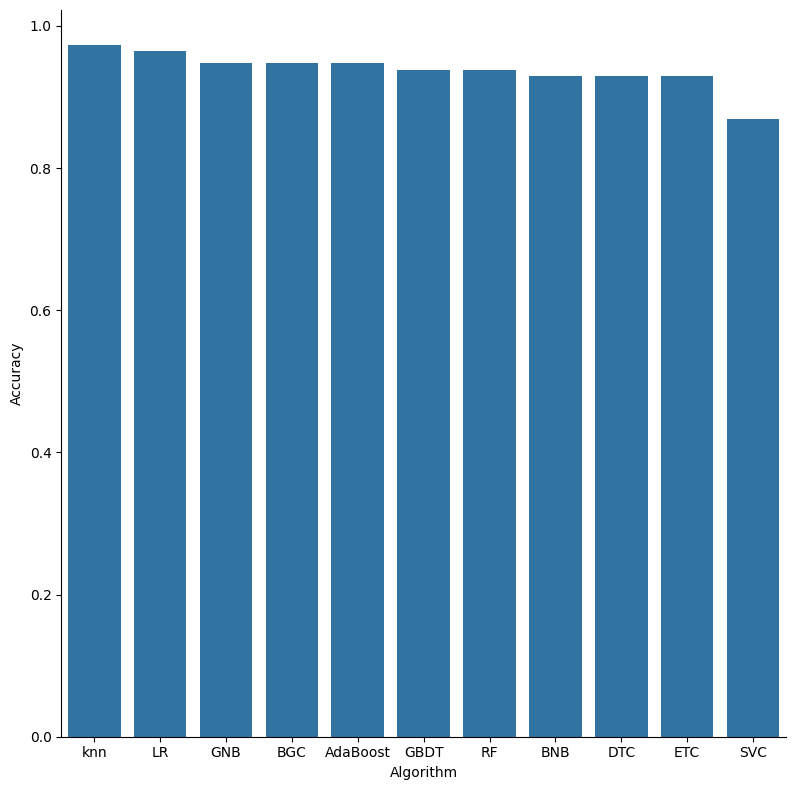

In [134]:

sns.catplot(x='Algorithm',y='Accuracy',data=DataFrame,kind='bar',height=8)

